In [64]:
import json
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

with open("crawl.json", "r") as file:
    data = json.load(file)

for i, tweet in enumerate(data):
    crawl_response = tweet["data"]
    for inner in crawl_response:
        G.add_node(inner["id"])
for i, tweet in enumerate(data):
    crawl_response = tweet["data"]
    for inner in crawl_response:
        if "referenced_tweets" in inner:
            referenced_list = inner["referenced_tweets"]
            for referenced in referenced_list:
                if referenced["type"] == "replied_to":
                    if (referenced["id"]) not in net:
                        G.add_node(referenced["id"])
                    G.add_edge(referenced["id"], inner["id"])

In [65]:
branch = nx.dfs_tree(G, '1158462872688586752')

In [66]:
len(list(nx.algorithms.dag.descendants(branch, '1158462872688586752')))

0

In [67]:
nx.is_tree(branch)

True

In [68]:
# Children of root
children = list(G["1158074774297468928"])
print(len(children))
children[:10]

59270


['1441249655480848384',
 '1430224818616504320',
 '1426376591773511681',
 '1423390836096651268',
 '1422524403770925067',
 '1421939730829115392',
 '1416000470972305409',
 '1401891168695242754',
 '1387543196285218818',
 '1385657316645785602']

In [111]:
# Children with more than 100 children itself
for child in children:
    if 20 < len(G[child]):
        print(child)

1158745587363254272
1158493949624872960
1158451952763723776
1158395997690707971
1158373294661197824
1158364761609973760
1158337141514149888
1158310190367694849
1158284445570490369
1158281489592668160
1158279979635023872
1158264212667301890
1158250706823987205
1158247481236426752
1158236477278625794
1158230303686578176
1158230110555652097
1158221402090004481
1158217972155944961
1158217664956948481
1158212336529727489
1158210525399924737
1158202969629876224
1158201499262050305
1158191227579318278
1158190113609932800
1158188839258730497
1158183142055981056
1158180774757011456
1158174787996401665
1158170803218685952
1158164837299642369
1158151857170046977
1158144707710468096
1158143936185229312
1158143748087304192
1158143429513289730
1158139104942387200
1158138833424138240
1158138304337981441
1158135388386541571
1158134235288473601
1158134067063402498
1158130953371488257
1158129460471689217
1158129417161498624
1158129349868052480
1158127587706773505
1158126351880208391
1158125614978625537


In [114]:
subgraph_nodes = nx.descendants(net, "1158079178127892483")
print(subgraph_nodes)
l = list(subgraph_nodes)
l.append("1158079178127892483")
subgraph = G.subgraph(l)
print(subgraph)

{'1158122174588190720', '1158130438977667072', '1158260955207340032', '1158129408412196864', '1158107920690757633', '1158141455124324353', '1158136015195951106', '1158128269985816583', '1158354353016774662', '1275527757653368833', '1158119594571247616', '1158224690764120064', '1158118670402375680', '1158154834245275650', '1158119475310260224', '1158499200356818946', '1158104063910825984', '1158335457534586887', '1159063611764903936', '1158167064126922752', '1158111943183523840', '1158150808095141888', '1158117575928287239', '1158389338951962624', '1158213830691811328', '1158132730208505856', '1158498593982111744', '1158120695919808512', '1158450285276278790', '1158120510649188352', '1158196214069788673', '1158488510929743878', '1158211376562810880', '1158128847109292033', '1158462243505430528', '1158149716804341760', '1158354544583012359', '1158142722705952770', '1158138288991084544', '1158111876326273025', '1158186661588549637', '1158282153588924416', '1158177521222868992', '115838605

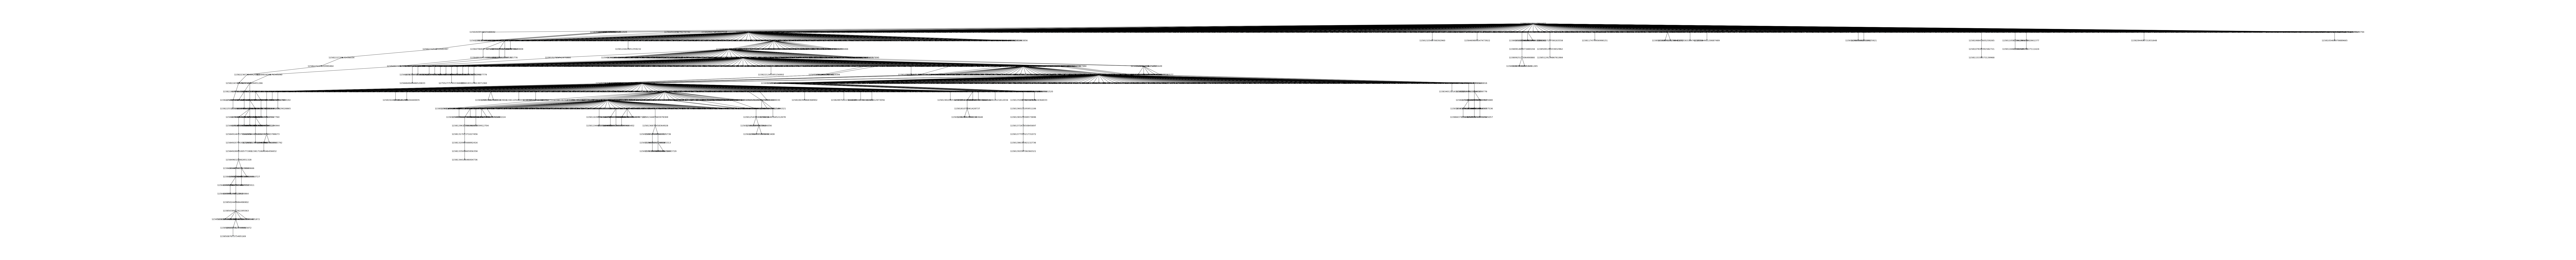

In [116]:
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
# same layout using matplotlib with no labels
pos =graphviz_layout(subgraph, prog='dot')
plt.figure(figsize=(200, 20), dpi=80)
nx.draw(subgraph, pos, node_size=1, with_labels=True)


In [119]:
nx.write_gml(subgraph, 'network.gml')